# Machine Learning Homework 4
# Name: Guru Sarath Thangamani
# UIN: 829009551

In [0]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import pandas

In [0]:
from google.colab import files
import io

import warnings
warnings.filterwarnings('ignore')

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# https://drive.google.com/open?id=1QKwHh3FkJ2Lznu522hp0crzJOCvUcHoj
downloaded = drive.CreateFile({'id':'1QKwHh3FkJ2Lznu522hp0crzJOCvUcHoj'}) 
downloaded.GetContentFile('OnlineNewsPopularityTest.csv') 

# https://drive.google.com/open?id=17a2nHMF7CZGzc73EUBThal3jbhDCLGsE
downloaded = drive.CreateFile({'id':'17a2nHMF7CZGzc73EUBThal3jbhDCLGsE'}) 
downloaded.GetContentFile('OnlineNewsPopularityTrain.csv') 

In [271]:
!ls

adc.json		       sample_data    Vectors2.bin
MyHWWords.txt		       text8	      Vectors.bin
OnlineNewsPopularityTest.csv   text8.bin      word2vec.model
OnlineNewsPopularityTrain.csv  text8-phrases


In [0]:
X_train = np.genfromtxt('OnlineNewsPopularityTrain.csv', delimiter=',', skip_header = 1, usecols = (i+1 for i in range(59)))
y_train = np.genfromtxt('OnlineNewsPopularityTrain.csv', delimiter=',', skip_header = 1, usecols = (60) )

X_test = np.genfromtxt('OnlineNewsPopularityTest.csv', delimiter=',', skip_header = 1, usecols = (i+1 for i in range(59)))
y_test = np.genfromtxt('OnlineNewsPopularityTest.csv', delimiter=',', skip_header = 1, usecols = (60) )

In [273]:
print('X train', X_train.shape)
print('y train', y_train.shape)

print('X test', X_test.shape)
print('X test', y_test.shape)

X train (38422, 59)
y train (38422,)
X test (1222, 59)
X test (1222,)


In [0]:
def split_data_set(X,y,split=2,shuffle=False):
    
    num_samples = X.shape[0]
    samples_per_split = num_samples // split
    
    if y.ndim == 1:
        y = np.array([y])
        y = y.T
            
    if X.ndim == 1:
        X = np.array([X])
        X = X.T
    
    if shuffle:
            
        print(X.shape, y.shape)
        FullFrame = np.hstack( (X,y) )
        print(FullFrame.shape)
        np.random.shuffle(FullFrame)
        
        X = FullFrame[:,0:-1]
        y = np.array( [ FullFrame[:,59] ] )
        print(X.shape, y.shape)
    
    X_splits = []
    y_splits = []
    
    for i in range(split):
        
        if i != split-1:
            X_splits.append( X[ i*samples_per_split:(i+1)*samples_per_split, : ] )
            y_splits.append( np.array( [y[ i*samples_per_split:(i+1)*samples_per_split, 0 ]]).T )
        else:
            X_splits.append( X[ i*samples_per_split:, : ] )
            y_splits.append( np.array( [y[ i*samples_per_split:, 0 ]]).T )
            
    return [X_splits , y_splits]  

In [0]:
folds = 5
Splits = split_data_set(X_train,y_train,split=folds, shuffle=False)

X_train_splits = Splits[0]
y_train_splits = Splits[1]

# Decision Tree regression

Depth = 1 -------------
Errors in all the 5 folds: [12704.522646716448, 12451.351711495125, 15982.790465630835, 6893.117134657534, 7827.603531315466]
Avg error - 11171.877097963083
Depth = 2 -------------
Errors in all the 5 folds: [12706.361503601018, 12409.630673317362, 15939.939116389296, 6866.115132557895, 7837.578632601012]
Avg error - 11151.925011693316
Depth = 3 -------------
Errors in all the 5 folds: [12692.374104878132, 12388.103599184531, 15927.67289966213, 6855.073213100711, 7827.648071444609]
Avg error - 11138.174377654022
Depth = 4 -------------
Errors in all the 5 folds: [12694.239972166159, 12397.997397379619, 15922.120784496236, 6852.498502277804, 7825.210225582775]
Avg error - 11138.413376380518
Depth = 5 -------------
Errors in all the 5 folds: [12694.503892741612, 12398.321141261533, 15923.260313107681, 6850.399814243473, 7826.081852938912]
Avg error - 11138.513402858644
Depth = 6 -------------
Errors in all the 5 folds: [12694.040672404715, 12398.321141261533, 1592

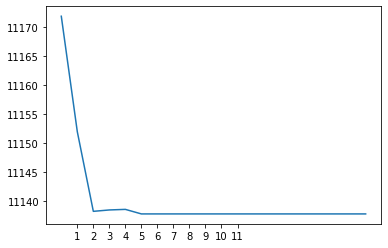

In [279]:
max_depth = [i+1 for i in range(20)]
avg_error = []

for d in max_depth:
    reg_model = tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=d, min_samples_leaf=2000, random_state=50)
    
    errors = []
    for fold_test_i in range(folds):
        
        TestSet_X = X_train_splits[fold_test_i]
        
        TrainSet_X = []
        TrainSet_y = []
        for fold_train_i in range(folds):
            if fold_train_i != fold_test_i:
                TrainSet_X.append(X_train_splits[fold_train_i])
                TrainSet_y.append(y_train_splits[fold_train_i])
        
        TrainSet_X = np.vstack(TrainSet_X)
        TrainSet_y = np.vstack(TrainSet_y)
        
        reg_model.fit(TrainSet_X, TrainSet_y)
        
        predict_y = reg_model.predict(TestSet_X)

        act_y = y_train_splits[fold_test_i]
        rmse_error = mean_squared_error(predict_y, act_y, squared=False)
        
        errors.append(rmse_error)

    print('Depth =', d, '-------------')    
    print('Errors in all the 5 folds:', errors)
    avg_error.append(np.mean(errors))
    print('Avg error -', np.mean(errors))

print(avg_error)
print(min(avg_error))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.plot(avg_error)

In [280]:
# Best depth = 6
reg_model = tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=6, min_samples_leaf=2000, random_state=50)
reg_model.fit(X_train, y_train)
predictions = reg_model.predict(X_test)
errorOnTest = mean_squared_error(predictions, y_test)
print('Testset error =', error_on_testSet)

Testset error = 8329.687133026458


# Random forest regression

In [0]:
class Random_Forest:
    
    def __init__(self, Train_file_loc):
        self.Train_file_loc = Train_file_loc
        
    def create_tree_parameters(self, num_features_per_tree, Max_features, num_trees = 10, depth = 2):
        
        self.num_trees = num_trees
        self.Max_features = Max_features
        self.num_features_per_tree = num_features_per_tree
        self.depth = depth
        
        self.trees_features_to_use = []
        for i in range(num_trees):
            
            treeX_params = []
            for j in range(num_features_per_tree):
                feature = randint(1, Max_features)
                treeX_params.append(feature)
        
            self.trees_features_to_use.append( tuple(treeX_params) )

    def create_trees(self):
        
        self.tree_models = []
        
        for t in range(self.num_trees):
            
            reg_model = tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=self.depth, min_samples_leaf=2000, random_state=30)
            self.tree_models.append(reg_model)
    
    def fit_rf(self, Full_TrainSet_X, y_train):
        
        for t in range(self.num_trees):
            X_train = []
            for col in self.trees_features_to_use[t]:
                colX = Full_TrainSet_X[:,col]
                colX = np.array([colX]).T
                X_train.append(colX)
            
            X_train = np.hstack(X_train)

            np.random.shuffle(X_train)
            numDataToTake = X_train.shape[0] // 2
            X_train = X_train[0:numDataToTake,:]
            
            self.tree_models[t].fit(X_train, y_train[0:numDataToTake])
            
            
    def predict_rf(self, Full_TestSet_X):
        
        predictions = []
        
        for t in range(self.num_trees):
            
            X_test = []
            for col in self.trees_features_to_use[t]:
                colX = Full_TestSet_X[:,col]
                colX = np.array([colX]).T
                X_test.append(colX)
            
            X_test = np.hstack(X_test)
            
            prediction = self.tree_models[t].predict(X_test)
            predictions.append(prediction)
        
        mean_predictions = predictions[0]
        for i,pred in enumerate(predictions):
            if i == 0:
                continue
            
            mean_predictions = mean_predictions + pred
        
        mean_predictions = mean_predictions / self.num_trees
        
        return mean_predictions

In [282]:
max_depth = [2,5,7,10,15,20]
max_trees = [3,5,10,15,20]

avg_errors_2D = np.zeros( ( len(max_trees) , len(max_depth) ))
avg_errors = []
loc_i = 0
for num_trees in max_trees:
    
    loc_j = 0
    for d in max_depth:
        
        print('Num Trees ---', num_trees, '   Depth ---', d)
        
        r_forest_model = Random_Forest('OnlineNewsPopularityTrain.csv')
        r_forest_model.create_tree_parameters(17,58, num_trees = num_trees, depth=d)
        r_forest_model.create_trees()

        errors = []
        for fold_test_i in range(folds):

            TestSet_X = X_train_splits[fold_test_i]

            TrainSet_X = []
            TrainSet_y = []
            for fold_train_i in range(folds):
                if fold_train_i != fold_test_i:
                    TrainSet_X.append(X_train_splits[fold_train_i])
                    TrainSet_y.append(y_train_splits[fold_train_i])

            TrainSet_X = np.vstack(TrainSet_X)
            TrainSet_y = np.vstack(TrainSet_y)

            r_forest_model.fit_rf(TrainSet_X, TrainSet_y)

            predict_y = r_forest_model.predict_rf(TestSet_X)

            act_y = y_train_splits[fold_test_i]
            rmse_error = mean_squared_error(predict_y, act_y, squared= False)

            errors.append(rmse_error)
        
        print('Errors in all the 5 folds:', errors)
        MeanError_One_Full_CrossVal = np.mean(errors)
        avg_errors.append(MeanError_One_Full_CrossVal)
        avg_errors_2D[loc_i][loc_j] = MeanError_One_Full_CrossVal
        print('Avg error -', MeanError_One_Full_CrossVal)

        loc_j += 1

    loc_i += 1

Num Trees --- 3    Depth --- 2
Errors in all the 5 folds: [12724.046569362174, 12498.377628849306, 16062.147746609337, 6984.6714602121365, 7868.297952735844]
Avg error - 11227.508271553761
Num Trees --- 3    Depth --- 5
Errors in all the 5 folds: [12717.421134833665, 12509.636647998374, 16062.100516001983, 6978.993940040527, 7865.722467818247]
Avg error - 11226.774941338559
Num Trees --- 3    Depth --- 7
Errors in all the 5 folds: [12729.960888094924, 12508.229812025074, 16057.208917594005, 6957.839438893067, 7882.767327728526]
Avg error - 11227.201276867121
Num Trees --- 3    Depth --- 10
Errors in all the 5 folds: [12720.974951614733, 12506.914848596572, 16068.924199212375, 6980.530195042351, 7882.1058403258]
Avg error - 11231.890006958367
Num Trees --- 3    Depth --- 15
Errors in all the 5 folds: [12736.580210990749, 12504.063949978168, 16055.340801016533, 6977.988207399826, 7880.6873418044]
Avg error - 11230.932102237934
Num Trees --- 3    Depth --- 20
Errors in all the 5 folds: [1

11216.736103455927

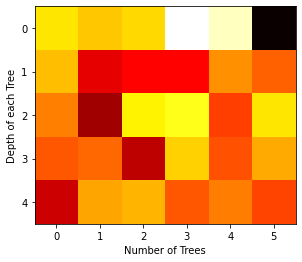

In [284]:
plt.xlabel('Number of Trees')
plt.ylabel('Depth of each Tree')
plt.imshow(avg_errors_2D, cmap='hot')

np.min(avg_errors_2D)

In [286]:
# Number of Trees 3
# Depth 20

r_forest_Bestmodel = Random_Forest('OnlineNewsPopularityTrain.csv')
r_forest_Bestmodel.create_tree_parameters(17,58, num_trees = 3, depth=20)
r_forest_Bestmodel.create_trees()
r_forest_Bestmodel.fit_rf(X_train, y_train)

predictions = r_forest_Bestmodel.predict_rf(X_test)
error_on_testSet = mean_squared_error(predictions, y_test, squared=False)

print('Error on Test set -', error_on_testSet)

Error on Test set - 8448.342738846994


# Feature exploration

In [287]:
Best_Model_Q1 = tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=6, min_samples_leaf=2000, random_state=42)
Best_Model_Q1.fit(TrainSet_X, TrainSet_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2000, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [288]:
n_nodes = Best_Model_Q1.tree_.node_count
children_left = Best_Model_Q1.tree_.children_left
children_right = Best_Model_Q1.tree_.children_right
feature = Best_Model_Q1.tree_.feature
threshold = Best_Model_Q1.tree_.threshold

print('Number of nodes in the decision tree = ', n_nodes)

Number of nodes in the decision tree =  21


In [0]:
Features = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']

In [0]:
dotfile = open("dt.dot", 'w')
graphic = tree.export_graphviz(Best_Model_Q1, out_file=dotfile, feature_names=Features)
dotfile.close()

# NLP feature extraction

In [0]:
urls = pandas.read_csv('OnlineNewsPopularityTrain.csv', usecols=[0])
urls_test = pandas.read_csv('OnlineNewsPopularityTest.csv', usecols=[0])

In [0]:
AllUrls = []
for i in range(urls.shape[0]):
    urlX = urls['url'][i]
    AllUrls.append(urlX)

All_LastWords_train = []
for i in range(len(AllUrls)):
    lastword = AllUrls[i].split('/')[-2]
    lastwords = lastword.split('-')
    All_LastWords_train.append(lastwords)

AllUrls = []
for i in range(urls_test.shape[0]):
    urlX = urls_test['url'][i]
    AllUrls.append(urlX)

All_LastWords_test = []
for i in range(len(AllUrls)):
    lastword = AllUrls[i].split('/')[-2]
    lastwords = lastword.split('-')
    All_LastWords_test.append(lastwords)


In [254]:
print(len(All_LastWords_train))
print(len(All_LastWords_test))
print(All_LastWords_test[0:3])
print(All_LastWords_train[0:3])

38422
1222
[['amazon', 'instant', 'video', 'browser'], ['ap', 'samsung', 'sponsored', 'tweets'], ['apple', '40', 'billion', 'app', 'downloads']]
[['entrepreneur', 'trends', '2013'], ['facebook', 'sick', 'app'], ['felt', 'audio', 'pulse', 'speaker']]


In [0]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

for w in All_LastWords_train:
  common_texts.append(w)

for w in All_LastWords_test:
  common_texts.append(w)

path = get_tmpfile("word2vec.model")
model = Word2Vec(common_texts, size=10, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [0]:
model = Word2Vec.load("word2vec.model")

In [0]:
vectors = []
for words in All_LastWords_train:
  vector = model.wv[words[0]]
  numWords = 1
  for i,word in enumerate(words):
    if i==0:
      continue
    vector != model.wv[word]
    numWords += 1
  
  meanVector = vector/numWords
  vectors.append(np.array([meanVector]))

In [259]:
allUrlVectors = np.vstack(vectors)
X_train_with_Url = np.hstack( (allUrlVectors , X_train) )
print(X_train_with_Url.shape)

(38422, 69)


In [0]:
vectors = []
for words in All_LastWords_test:
  vector = model.wv[words[0]]
  numWords = 1
  for i,word in enumerate(words):
    if i==0:
      continue
    vector != model.wv[word]
    numWords += 1
  
  meanVector = vector/numWords
  vectors.append(np.array([meanVector]))

In [261]:
allUrlVectors = np.vstack(vectors)
X_test_with_Url = np.hstack( (allUrlVectors , X_test) )
print(X_test_with_Url.shape)

(1222, 69)


In [265]:
dTreeModel = tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=50, min_samples_leaf=2000, random_state=50)
dTreeModel.fit(X_train_with_Url, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2000, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=50, splitter='best')

In [266]:
predictions = dTreeModel.predict(X_test_with_Url)
error_on_testSet = mean_squared_error(predictions, y_test, squared=False)
print(error_on_testSet)

8329.687133026458
